# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [1]:
from Deep_Q_Learning import DQ_Learner

# --- SET PARAMETERS HERE ---
env_name='Banana_Windows_x86_64\Banana.exe' # Path to executable
state_size=37 # Number of dimensions in environment
action_size=4 # Number of possible actions
seed=0        # Random seed for learning model. Zero for true randomness

buffer_size = int(1e5)  # Replay buffer size
batch_size = 64         # Minibatch size
gamma = 0.99            # Discount factor
tau = 1e-3              # For soft update of target parameters
lr = 5e-4               # Learning rate 
update_every = 4        # How often to update the network

n_episodes=1800  # Total number of episodes
max_t=5000       # Number of actions per episode
eps_start=1.0    # Initial value for epsilon [probability of taking greedy action]
eps_end=0.01     # Minimum epsilon value
eps_decay=0.995  # Rate of diminishing epsilon value
score_window=100 # Number of episodes to average results
model_name='Banana_Collecting_weights' # Name to save fully trained model

x_axis='Episode #' # Labels of results graph
y_axis='Score'
# ---------------------------

In [2]:
# Set up Unity environment
agent_params = [buffer_size, batch_size, gamma, tau, lr, update_every]
DQL = DQ_Learner(env_name, state_size, action_size, seed, agent_params)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


NOTE: The environment will wait until deep_q_learn is run


In [3]:
# Train for n episodes
DQL.deep_q_learn(n_episodes, max_t, eps_start, eps_end, eps_decay, model_name, score_window)

Episode 100	Average Score: 0.54
Episode 200	Average Score: 4.03
Episode 300	Average Score: 7.45
Episode 400	Average Score: 9.42
Episode 500	Average Score: 12.40
Episode 600	Average Score: 13.41
Episode 700	Average Score: 14.43
Episode 800	Average Score: 15.08
Episode 900	Average Score: 15.54
Episode 1000	Average Score: 14.54
Episode 1100	Average Score: 15.77
Episode 1200	Average Score: 14.88
Episode 1300	Average Score: 15.42
Episode 1400	Average Score: 15.84
Episode 1500	Average Score: 15.36
Episode 1600	Average Score: 15.53
Episode 1700	Average Score: 15.67
Episode 1800	Average Score: 14.73


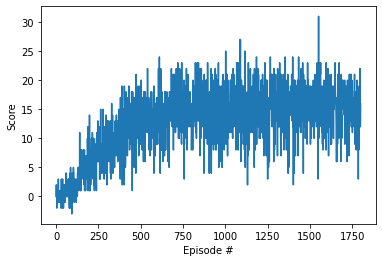

In [4]:
# Display training results
DQL.display(x_axis, y_axis)

When finished, you can close the environment.

In [5]:
DQL.terminate()

NOTE: Environment closed. No further training can be done.


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```